In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle
import umap

In [4]:
original_emb = pd.read_csv('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/gene_embs/dev_model/F4/Mesenchyme1/in_silico_delete_cnot1_del_dict_1Kbatch_original.csv', index_col=0)
perturb_emb = pd.read_csv('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/gene_embs/dev_model/F4/Mesenchyme1/in_silico_delete_cnot1_del_dict_1Kbatch_perturb.csv', index_col=0)

In [5]:
objects = []
with (open("/mnt/scratchc/ghlab/toby/Geneformer/geneformer/token_dictionary.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
token_dict = objects[0]
codon_opts = pd.read_csv('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/cds_codon_optimalities.csv')


In [10]:
def getCodonOpt(gene):
    matching_rows = codon_opts[codon_opts['ensembl_id'] == gene]
    
    if not matching_rows.empty:
        codon_opt = matching_rows['codon_opt_score'].iloc[0]
        return codon_opt
    else:
        # Handle the case where no matching rows are found
        return None
    
def getPerAaCodonOpt(gene):
    matching_rows = codon_opts[codon_opts['ensembl_id'] == gene]
    
    if not matching_rows.empty:
        codon_opt = matching_rows['per_aa_codon_opt_score'].iloc[0]
        return codon_opt
    else:
        # Handle the case where no matching rows are found
        return None
    
def get_key_by_value(value):
    return next((key for key, val in token_dict.items() if val == value))

def binOptsByToken(df):
    opt_bins = [0,25,30,60]
    opt_labels = ['Non-Optimal','Neutral','Optimal']
    per_aa_bins = [0,0.5,0.6,0.7,1]
    per_aa_labels = ['low', 'low medium', 'medium high', 'high']
    df['gene'] = df['token'].apply(get_key_by_value)
    df['codon_opt_score'] = df['gene'].apply(getCodonOpt)
    df['per_aa_codon_opt_score'] = df['gene'].apply(getPerAaCodonOpt)
    df['opt_category'] = pd.cut(df['codon_opt_score'], bins=opt_bins, labels=opt_labels)
    df['per_aa_opt_category'] = pd.cut(df['per_aa_codon_opt_score'], bins=per_aa_bins, labels=per_aa_labels)
    return df


In [11]:
perturb_emb = binOptsByToken(perturb_emb)

In [12]:
perturb_emb['per_aa_opt_category'].value_counts()

per_aa_opt_category
low            463
high           446
medium high    426
low medium     414
Name: count, dtype: int64

/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


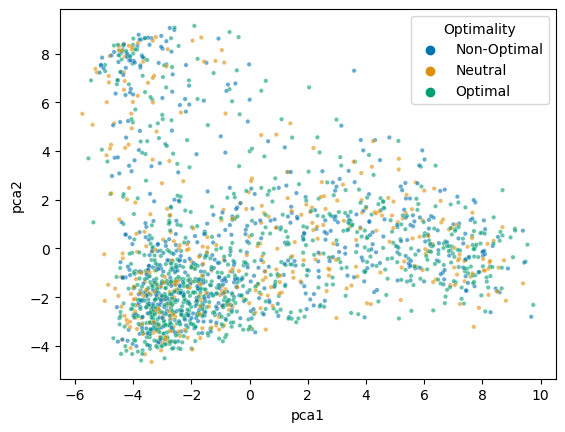

In [13]:
perturb_embs_only = perturb_emb.iloc[:,:256]
perturb_pca = PCA(n_components=2).fit_transform(perturb_embs_only)
df_pca = pd.DataFrame()
df_pca['pca1'] = perturb_pca[:,0]
df_pca['pca2'] = perturb_pca[:,1]
df_pca['Optimality'] = perturb_emb['opt_category']
scatter = sns.scatterplot(x='pca1', y='pca2', data=df_pca,
                          s=10, alpha=0.6, hue='Optimality',
                          palette=sns.color_palette('colorblind',3), legend='full')
#plt.savefig('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/analysis/gene_emb_analysis/kf0_PCA_codon_opt.png')
plt.show()

/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

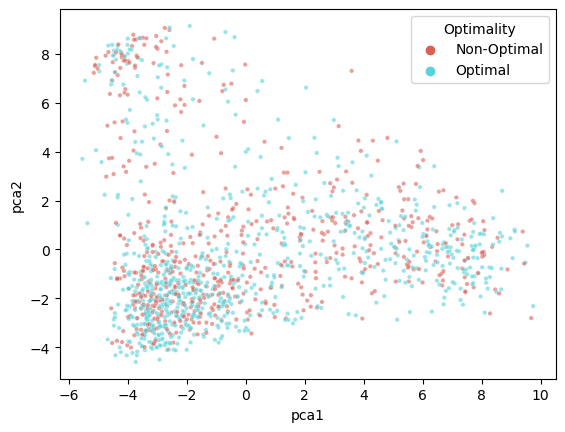

In [14]:
perturb_embs_only = perturb_emb.iloc[:,:256]
perturb_pca = PCA(n_components=2).fit_transform(perturb_embs_only)
df_pca = pd.DataFrame()
df_pca['pca1'] = perturb_pca[:,0]
df_pca['pca2'] = perturb_pca[:,1]
df_pca['Optimality'] = perturb_emb['opt_category']
df_pca = df_pca[(df_pca['Optimality'] == 'Non-Optimal') | (df_pca['Optimality'] == 'Optimal')]
df_pca['Optimality'] = df_pca['Optimality'].astype('str')
scatter = sns.scatterplot(x='pca1', y='pca2', data=df_pca,
                          s=10, alpha=0.6, hue='Optimality',
                          palette=sns.color_palette('hls',2), legend='full')
#plt.savefig('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/analysis/gene_emb_analysis/kf0_PCA_codon_opt_train_labels.png')
plt.show()

/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated

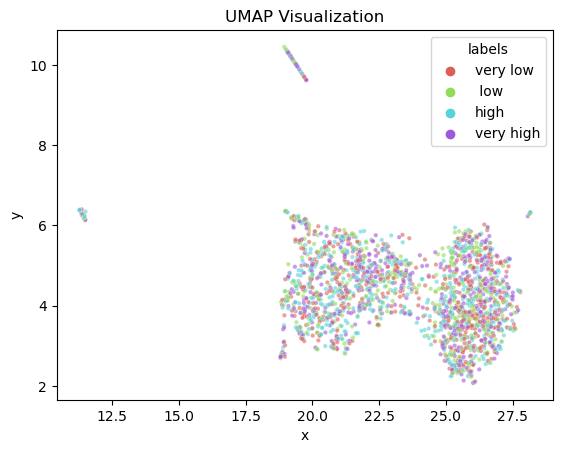

In [11]:
perturb_embs_only = perturb_emb.iloc[:,:256]
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_result = umap_model.fit_transform(perturb_embs_only)
umap_df = pd.DataFrame({'x':umap_result[:,0], 'y':umap_result[:,1], 'labels': perturb_emb['opt_category']})

# Plot the UMAP visualization
scatter = sns.scatterplot(x='x', y='y', data=umap_df,
                          s=10, alpha=0.6, hue='labels',
                          palette=sns.color_palette('hls',4), legend='full')
plt.title('UMAP Visualization')
#plt.savefig('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/analysis/gene_emb_analysis/CNOT1-unsupervised-UMAP.png')
plt.show()

/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated

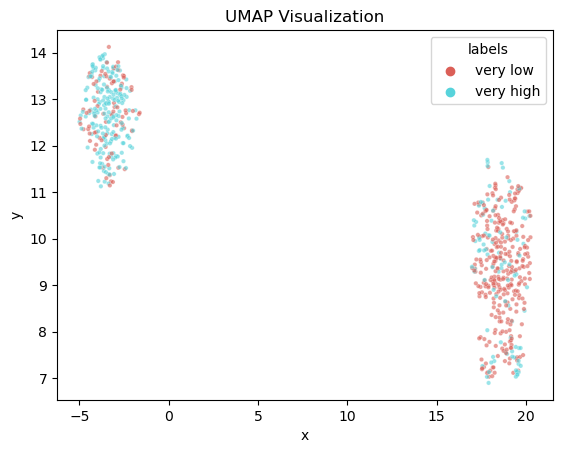

In [54]:
#perturb_emb = perturb_emb[(perturb_emb['opt_category'] == 'very low') | (perturb_emb['opt_category'] == 'very high')]
perturb_embs_only = perturb_emb.iloc[:,:256]
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_result = umap_model.fit_transform(perturb_embs_only)
umap_df = pd.DataFrame({'x':umap_result[:,0], 'y':umap_result[:,1], 'labels': perturb_emb['opt_category']})
umap_df = umap_df[(umap_df['labels'] == 'very low') | (umap_df['labels'] == 'very high')]
umap_df['labels'] = umap_df['labels'].astype('str')
# Plot the UMAP visualization
scatter = sns.scatterplot(x='x', y='y', data=umap_df,
                          s=10, alpha=0.6, hue='labels',
                          palette=sns.color_palette('hls',2), legend='full')
plt.title('UMAP Visualization')
#plt.savefig('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/analysis/gene_emb_analysis/CNOT1-unsupervised-UMAP-train-labels.png')
plt.show()

/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_2039617/569409101.py:7: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  scatter = sns.scatterp

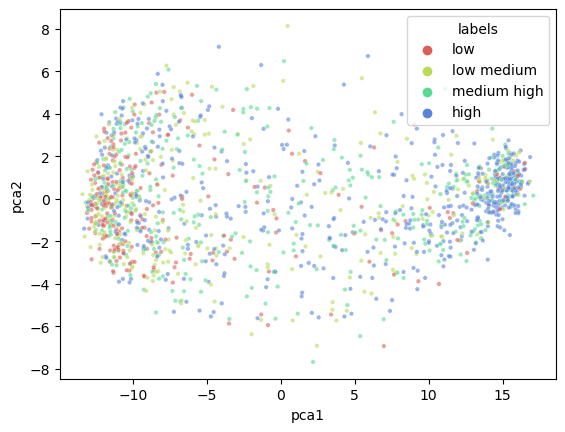

In [10]:
perturb_embs_only = perturb_emb.iloc[:,:256]
perturb_pca = PCA(n_components=2).fit_transform(perturb_embs_only)
df_pca = pd.DataFrame()
df_pca['pca1'] = perturb_pca[:,0]
df_pca['pca2'] = perturb_pca[:,1]
df_pca['labels'] = perturb_emb['per_aa_opt_category']
scatter = sns.scatterplot(x='pca1', y='pca2', data=df_pca,
                          s=10, alpha=0.6, hue='labels',
                          palette=sns.color_palette('hls',4), legend='full')
plt.savefig('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/analysis/gene_emb_analysis/base_model_PCA_per_aa_codon_opt.png')
plt.show()

/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

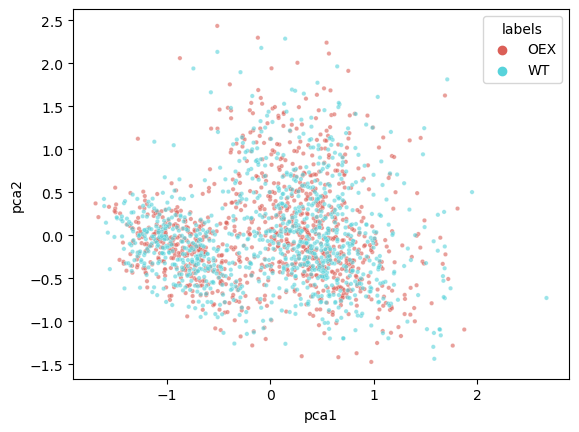

In [2]:
#clustering cnot1-perturbation
perturb = pd.read_csv('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/in_silico_pt_embs/opt_model/heart-ft/in_silico_overexpress_ccr4-not_dict_1Kbatch_perturb.csv', index_col=0)
original = pd.read_csv('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/in_silico_pt_embs/opt_model/heart-ft/in_silico_overexpress_ccr4-not_dict_1Kbatch_original.csv', index_col=0)
perturb['label'] = 'OEX'
original['label'] = 'WT'
joint_emb = pd.concat([perturb, original], axis=0, ignore_index=True)
joint_embs_only = joint_emb.iloc[:,:256]
perturb_pca = PCA(n_components=2).fit_transform(joint_embs_only)
df_pca = pd.DataFrame()
df_pca['pca1'] = perturb_pca[:,0]
df_pca['pca2'] = perturb_pca[:,1]
df_pca['labels'] = joint_emb['label']
scatter = sns.scatterplot(x='pca1', y='pca2', data=df_pca,
                          s=10, alpha=0.6, hue='labels',
                          palette=sns.color_palette('hls',2), legend='full')
plt.savefig('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/analysis/embs/CCR4-NOT-perturbation-PCA.png')
plt.show()

/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated

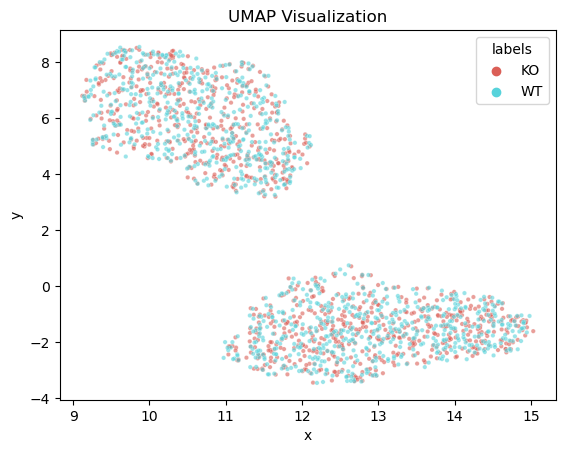

In [15]:
perturb = pd.read_csv('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/in_silico_pt_embs/opt_model/nf_cm1/in_silico_delete_cnot1_dict_1Kbatch_perturb.csv', index_col=0)
original = pd.read_csv('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/in_silico_pt_embs/opt_model/nf_cm1/in_silico_delete_cnot1_dict_1Kbatch_original.csv', index_col=0)
perturb['label'] = 'KO'
original['label'] = 'WT'
joint_emb = pd.concat([perturb,original], axis=0, ignore_index=True)
joint_embs_only = joint_emb.iloc[:,:256]
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_result = umap_model.fit_transform(joint_embs_only)
umap_df = pd.DataFrame({'x':umap_result[:,0], 'y':umap_result[:,1], 'labels': joint_emb['label']})

# Plot the UMAP visualization
scatter = sns.scatterplot(x='x', y='y', data=umap_df,
                          s=10, alpha=0.6, hue='labels',
                          palette=sns.color_palette('hls',2), legend='full')
plt.title('UMAP Visualization')
#plt.savefig('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/analysis/embs/CNOT1-unsupervised-UMAP.png')
plt.show()

/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated

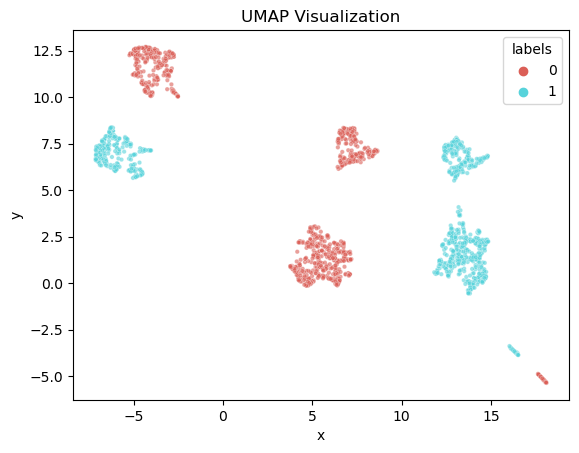

In [11]:
perturb = pd.read_csv('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/in_silico_pt_embs/opt_model/in_silico_delete_cnot1_dict_1Kbatch_perturb.csv', index_col=0)
original = pd.read_csv('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/in_silico_pt_embs/opt_model/in_silico_delete_cnot1_dict_1Kbatch_original.csv', index_col=0)
perturb['label'] = 'KO'
original['label'] = 'WT'
joint_emb = pd.concat([perturb, original], axis=0, ignore_index=True)
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
supervised_emb = joint_emb
supervised_emb['label'] = supervised_emb['label'].str.replace('KO','1')
supervised_emb['label'] = supervised_emb['label'].str.replace('WT','0').astype('int')
umap_result = umap_model.fit_transform(joint_embs_only, y=supervised_emb['label'])
umap_df = pd.DataFrame({'x':umap_result[:,0], 'y':umap_result[:,1], 'labels': joint_emb['label']})

# Plot the UMAP visualization
scatter = sns.scatterplot(x='x', y='y', data=umap_df,
                          s=10, alpha=0.6, hue='labels',
                          palette=sns.color_palette('hls',2), legend='full')
plt.title('UMAP Visualization')
plt.savefig('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/analysis/embs/CNOT1-supervised-UMAP.png')
plt.show()

array([[-1.41385996e+00,  1.22184894e-16],
       [-1.41385996e+00,  1.22184894e-16],
       [-1.41385996e+00,  1.22184894e-16],
       ...,
       [ 1.41385996e+00, -1.22184894e-16],
       [ 1.41385996e+00, -1.22184894e-16],
       [ 1.41385996e+00, -1.22184894e-16]])

/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/clark04/anaconda3/envs/pkgtorch/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

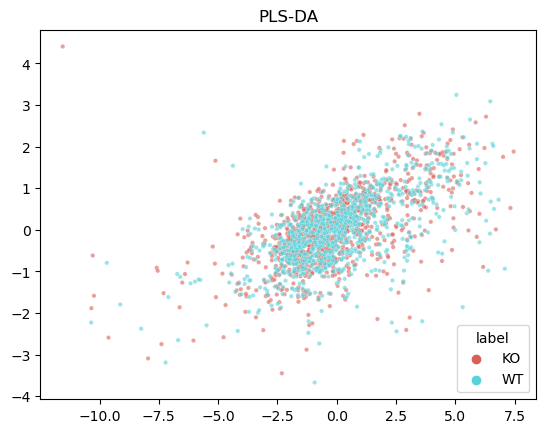

In [36]:
from sklearn.cross_decomposition import PLSSVD
import matplotlib.pyplot as plt

perturb = pd.read_csv('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/in_silico_pt_embs/opt_model/in_silico_delete_cnot1_dict_1Kbatch_perturb.csv', index_col=0)
original = pd.read_csv('/mnt/scratchc/ghlab/toby/in_silico_perturb_data/in_silico_pt_embs/opt_model/in_silico_delete_cnot1_dict_1Kbatch_original.csv', index_col=0)
perturb['label'] = 'KO'
original['label'] = 'WT'
joint_emb = pd.concat([perturb, original], axis=0, ignore_index=True)
#supervised_emb = joint_emb
#supervised_emb['label'] = supervised_emb['label'].str.replace('KO','1')
#supervised_emb['label'] = supervised_emb['label'].str.replace('WT','0').astype('int')
dummy_df = pd.get_dummies(joint_emb['label'], prefix='label')
supervised_emb = pd.concat([joint_emb, dummy_df], axis=1)

X = supervised_emb.iloc[:,:256]
y = supervised_emb[['label_KO','label_WT']]


pls_da = PLSSVD(n_components=2)
pls_da.fit(X, y)

X_pls_da = pls_da.transform(X)

scatter = sns.scatterplot(x=X_pls_da[:,0], y=X_pls_da[:,1], 
                          s=10, alpha=0.6, hue=joint_emb['label'],
                          palette=sns.color_palette('hls',2), legend='full')
plt.title('PLS-DA')
plt.show()